<a href="https://colab.research.google.com/github/GGMmattos/Classificacao_de_Sentimentos/blob/main/Classifica%C3%A7%C3%A3o_de_sentimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de sentimento de texto com Spacy


# Importação e instalação das bibliotecas

In [ ]:
!pip install spacy --upgrade

In [ ]:
# !python3 -m spacy download pt
!pip install spacy==2.2.3


In [37]:
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np

# Carregamento da base de dados

In [38]:
base_dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Curso de Py MACHINE LEANING/Materiais/Bases de dados/base_treinamento.txt', encoding = 'utf-8')

In [39]:
base_dados

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria
...,...,...
191,estou chocado e amedrontado com este assassina...,medo
192,é preciso afugenta com ímpeto este medo do inf...,medo
193,políticos usam suas forças para afugentar e am...,medo
194,o objetivo disso e apenas me amedrontar mais,medo


<Axes: xlabel='emocao', ylabel='count'>

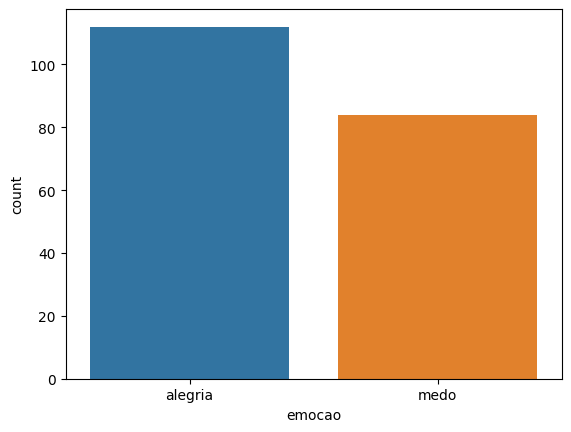

In [40]:
sns.countplot(base_dados, x="emocao")

# Função de pré-processamento dos dados


In [41]:
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS

In [43]:
print(stop_words)

{'muitos', 'quer', 'direita', 'ela', 'vinda', 'vem', 'estar', 'foi', 'geral', 'relação', 'próprio', 'sabe', 'nossa', 'já', 'todas', 'pelos', 'então', 'ambas', 'somos', 'usar', 'aí', 'quarto', 'coisa', 'aquilo', 'doze', 'porquanto', 'na', 'diz', 'quieto', 'corrente', 'pode', 'nos', 'faço', 'tive', 'tuas', 'também', 'conselho', 'final', 'desde', 'quarta', 'fazes', 'vêm', 'aqui', 'para', 'da', 'novas', 'algumas', 'eles', 'após', 'bem', 'tu', 'qualquer', 'teve', 'aquelas', 'sétima', 'fará', 'tipo', 'ser', 'ele', 'quê', 'quatro', 'for', 'sim', 'tenho', 'nuns', 'seria', 'daquele', 'porém', 'último', 'era', 'obrigada', 'quem', 'obrigado', 'fim', 'dezanove', 'ver', 'eu', 'tivemos', 'dar', 'sob', 'tentar', 'quinze', 'deste', 'fazia', 'tentaram', 'tiveram', 'terceiro', 'tendes', 'ontem', 'cujo', 'tais', 'área', 'do', 'outros', 'quanto', 'foste', 'posso', 'isto', 'querem', 'estava', 'primeira', 'exemplo', 'grande', 'seis', 'lá', 'nesse', 'meus', 'num', 'nossos', 'em', 'estes', 'povo', 'vais', 'ma

In [44]:
len(stop_words)

416

In [45]:
pln = spacy.load("pt_core_news_sm")
pln

In [46]:
def preprocessamento(texto):
  texto = texto.lower()
  documento = pln(texto)

  lista = []
  for token in documento:
    #lista.append(token.text)
    lista.append(token.lemma_)

  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontuacoes]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])

  return lista


In [47]:
teste = preprocessamento('Estou aprendendo 1 10 23 processamento de linguagem natural, Curso muito bom')


In [48]:
base_dados['texto'] = base_dados['texto'].apply(preprocessamento)

In [49]:
base_dados

,texto,emocao
0,trabalho agradável,alegria
1,gosto ficar em o aconchego,alegria
2,fiz adesão a o curso hoje,alegria
3,admirar,alegria
4,adorar,alegria
...,...,...
191,chocado amedrontar assassinato brutal,medo
192,preciso afugentar ímpeto medo de o inferno,medo
193,político força afugentar amedrontar,medo
194,objetivo de isso amedrontar,medo


In [50]:
base_dados_final = []
for texto, emocao in zip(base_dados['texto'], base_dados['emocao']):
  if emocao == 'alegria':
    dic = ({'ALEGRIA': True, 'MEDO': False})
  elif emocao == 'medo':
    dic = ({'ALEGRIA': False, 'MEDO': True})

  base_dados_final.append([texto, dic.copy()])

In [52]:
len(base_dados_final)

196

In [57]:
base_dados_final[0]

['trabalho agradável', {'ALEGRIA': True, 'MEDO': False}]

# Criação do classificador

In [ ]:
!pip install spacy==2.2.3


In [69]:
model = spacy.blank('pt')
model.add_pipe('textcat')
textcat = model.get_pipe('textcat')
textcat.add_label('MEDO')
textcat.add_label('ALEGRIA')
historico = []

In [ ]:
model.begin_training()
for epoca in range(1000):
  pass